<a href="https://colab.research.google.com/github/RafaelLVaz/Modelagem-Linear-para-Aprendizado-de-Maquina-Explorando-Dados/blob/main/Pok%C3%A9mon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise exploratória de dados - Exploratory Data Analysis (EDA)

Nesta atividade, geraremos gráficos e obteremos informações estatísticas de um dataset do Kaggle "Pokemon with Stats"

Pokemons with stats

O dataset "Pokemon with stats" mostra informações sobre vários Pokémons, seus atributos como: ataque, defesa, velocidade, vida e seus tipos principais. Ele permite observar e comparar as características e o desempenho de cada um.


Link do dataset usado: https://www.kaggle.com/datasets/abcsds/pokemon?resource=download

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

poke = pd.read_csv('Pokemon.csv')
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Name:** Nome de cada pokémon

**Type 1:** Indica o tipo do pokémon que determina suas fraquezas, resistências e ataques

**Type 2:** Indica o as segundas caracteristicas de fraquezas, resistências e ataques

**Total:** Soma de todos os status do pokémon e determina o quão forte ele é

**HP:** Pontos de saúde, define quanto dano um pokémon pode suportar

**Attack:** Determina o dano causado por seus ataques

**Defense:** Determina a resistência base contra danos de ataques

**SP Atk:** Determina o dano causado por seus ataques especiais e poderes

**SP Def:** Determina a resistência base contra danos de ataques especiais

**Speed:** Determina qual pokémon ataca primeiro a cada rodada

**Generation:** Indica em qual leva o pokémon foi criado

**Legendery:** Indica se o pokémon é lendário ou não

In [ ]:
poke.shape
#número de linhas (800) e colunas (13)

(800, 13)

In [ ]:
poke.info()

'''
Ele te dá um resumo com:
O número de linhas e colunas.
Quantos valores não nulos existem em cada coluna (ou seja, se tem dados faltando).
O tipo de dado de cada coluna (por exemplo: int64, float64, booleano).
Quanto de memória o DataFrame está usando.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


'\nEle te dá um resumo com:\nO número de linhas e colunas.\nQuantos valores não nulos existem em cada coluna (ou seja, se tem dados faltando).\nO tipo de dado de cada coluna (por exemplo: int64, float64, booleano).\nQuanto de memória o DataFrame está usando.\n'

In [ ]:
mean = poke['Total'].mean() #média do total de todos os pokemons
print(mean)

mode = poke['Total'].mode() #moda do total de todos os pokemons
print(mode)

#pokemon com o total mais fraco
min = poke['Total'].min()
print(min)

#pokemon com o total mais forte
max = poke['Total'].max()
print(max)

mode_type = poke['Type 1'].mode() #moda do tipo de pokemon
print(mode_type)

435.1025
0    600
Name: Total, dtype: int64
180
780
0    Water
Name: Type 1, dtype: object


Text(0.5, 1.0, 'Distribuição dos Pokémons por poder total')

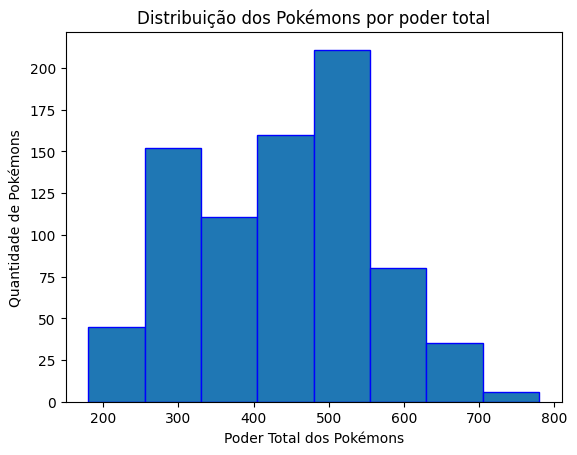

In [ ]:
plt.hist(poke['Total'], bins=8, edgecolor='blue')
plt.xlabel('Poder Total dos Pokémons')
plt.ylabel('Quantidade de Pokémons')
plt.title('Distribuição dos Pokémons por poder total')

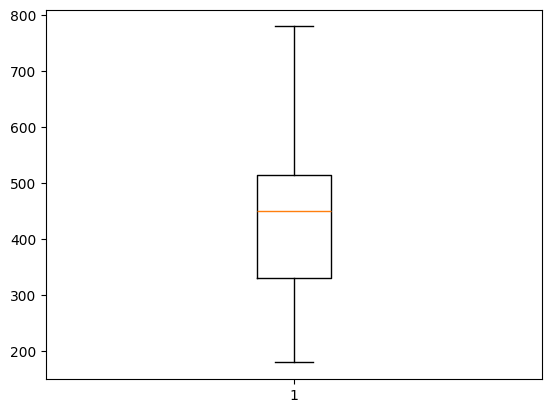

In [ ]:
plt.boxplot(poke['Total'])

plt.show()

In [ ]:
df_sorted = poke.sort_values(by='Total', ascending=False) #ordenando os pokemons em order crescente
df_sorted[['Name', 'Total', 'Type 1']].head(50) #pegando os 50 mais fortes

,Name,Total,Type 1
426,RayquazaMega Rayquaza,780,Dragon
163,MewtwoMega Mewtwo X,780,Psychic
164,MewtwoMega Mewtwo Y,780,Psychic
422,KyogrePrimal Kyogre,770,Water
424,GroudonPrimal Groudon,770,Ground
552,Arceus,720,Normal
418,LatiasMega Latias,700,Dragon
494,GarchompMega Garchomp,700,Dragon
413,MetagrossMega Metagross,700,Steel
796,DiancieMega Diancie,700,Rock


In [ ]:
top_pokemons = df_sorted.head(50)

mode_tipo = top_pokemons['Type 1'].mode() #moda do tipo de pokemon mais forte
print(mode_tipo)

mean_top = top_pokemons['Total'].mean() #média dos pokemons mais fortes
print(mean_top)

0    Dragon
Name: Type 1, dtype: object
673.28


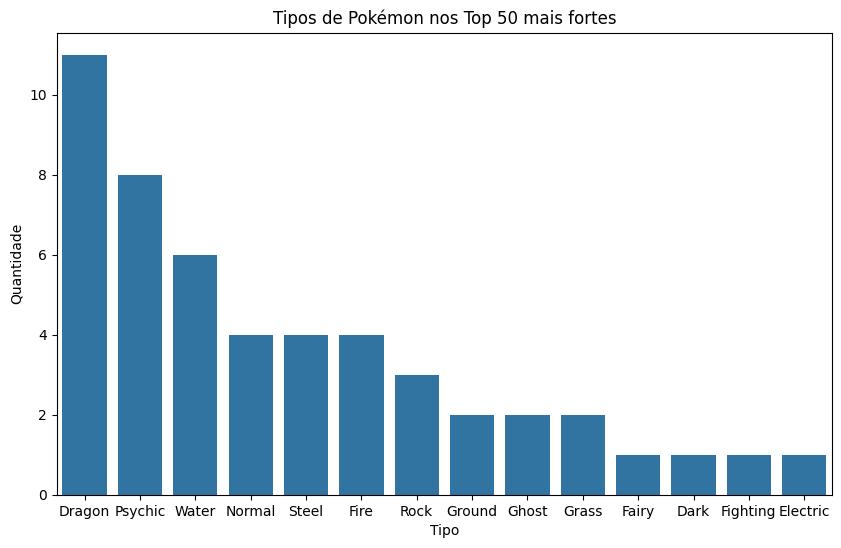

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type 1', data=top_pokemons, order=top_pokemons['Type 1'].value_counts().index)
plt.title('Tipos de Pokémon nos Top 50 mais fortes')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

plt.show()

Um dos principais insights da análise foi perceber como a distribuição dos tipos de Pokémon muda quando comparamos o dataset completo, com os 50 mais fortes. No geral, os Pokémons do tipo água são os mais comuns (como mostra o mode total) e a média geral dos pokemons é de 435.1025. No entanto, entre os 50 mais poderosos (com a média de 673.28), os 'dragons' é o tipo que mais aparece, mostrando que frequência não significa necessariamente força, e que dragons geralmente são os pokemons mais fortes.